# Análisis Exploratorio de Datos (EDA)

In [73]:
from funciones_1 import *

In [74]:
df_compas_raw_risk_of_reicidivism = pd.read_csv("https://raw.githubusercontent.com/MangelFdz/nuclio_g3_bias/main/users/Grupo/df_compas_raw_risk_of_reicidivism.csv", delimiter=',')
df_compas_2y = pd.read_csv("https://raw.githubusercontent.com/MangelFdz/nuclio_g3_bias/main/users/Grupo/df_compas_2y.csv", delimiter=',')

# Análisis del Dataset1: "Compas-scores"

## 1. Análisis y distribuciones

In [75]:
# Agrupar por 'Person_ID' y tomar el primer valor de 'Sex_Code_Text' y 'Ethnic_Code_Text'
grouped_by_way = df_compas_raw_risk_of_reicidivism.groupby('Person_ID').agg({
    'Sex_Code_Text': 'first',
    'Ethnic_Code_Text': 'first',
    'MaritalStatus': 'first',
    'ScoreText': 'first',
    'DecileScore': 'first',
    'age': 'first',
    'RecSupervisionLevelText': 'first'
})

grouped_by_way

Sex_Code_Text  Ethnic_Code_Text MaritalStatus ScoreText  \
Person_ID                                                           
656              Female  African-American        Single      High   
667                Male  African-American        Single    Medium   
684              Female         Caucasian        Single      High   
737                Male         Caucasian        Single      High   
745                Male  African-American        Single       Low   
...                 ...               ...           ...       ...   
68600            Female         Caucasian        Single       Low   
68602            Female         Caucasian        Single    Medium   
68603              Male         Caucasian        Single    Medium   
68604              Male         Caucasian        Single      High   
68608              Male         Caucasian        Single    Medium   

           DecileScore  age             RecSupervisionLevelText  
Person_ID                                                        
656                  9   33                                High  
667                  5   26                              Medium  
684                  9   33  Medium with Override Consideration  
737                  8   24  Medium with Override Consideration  
745                  3   32                                 Low  
...                ...  ...                                 ...  
68600                1   45                                 Low  
68602                5   20                                 Low  
68603                5   29                                 Low  
68604                8   30  Medium with Override Consideration  
68608                5   25                                 Low  

[18610 rows x 7 columns]

### 1.1. Distribución Demográfica

#### 1.1.1. Distribución por Género

In [76]:
# Contar la distribución por género
sex_distribution = grouped_by_way['Sex_Code_Text'].value_counts()

# Calcular el porcentaje de cada categoría
sex_distribution_percentage = (sex_distribution / sex_distribution.sum()) * 100

# Crear un nuevo DataFrame con las frecuencias y porcentajes
sex_distribution_df = sex_distribution.reset_index()
sex_distribution_df.columns = ['Sex_Code_Text', 'Count']
sex_distribution_df['Percentage'] = sex_distribution_percentage.values

# Crear gráfico ordenado de mayor a menor
figura1 = px.bar(sex_distribution_df, 
                 x='Sex_Code_Text', 
                 y='Count', 
                 title='Distribución por Género', 
                 labels={'Sex_Code_Text': 'Género', 'Count': 'Cantidad'}, 
                 color='Sex_Code_Text',
                 category_orders={"Sex_Code_Text": sex_distribution.index},  # Ordenar de mayor a menor
                 text=sex_distribution_df['Percentage'].round(2).astype(str) + '%'  # Mostrar porcentaje
                )

print(sex_distribution)
print(sex_distribution.sum())

# Mejorar diseño
figura1.update_traces(textposition='outside')  # Colocar el texto fuera de las barras
figura1.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Mostrar gráfico
figura1.show()

Male      14443
Female     4167
Name: Sex_Code_Text, dtype: int64
18610


#### 1.1.2 Distribución por Etnia

In [77]:
# Contar la distribución por etnia
ethnicity_distribution = grouped_by_way['Ethnic_Code_Text'].value_counts()

# Calcular el porcentaje de cada categoría
ethnicity_distribution_percentage = (ethnicity_distribution / ethnicity_distribution.sum()) * 100

# Crear un nuevo DataFrame con las frecuencias y porcentajes
ethnicity_distribution_df = ethnicity_distribution.reset_index()
ethnicity_distribution_df.columns = ['Ethnic_Code_Text', 'Count']
ethnicity_distribution_df['Percentage'] = ethnicity_distribution_percentage.values

# Crear gráfico ordenado de mayor a menor
figura2 = px.bar(ethnicity_distribution_df, 
                 x='Ethnic_Code_Text', 
                 y='Count', 
                 title='Distribución por Raza', 
                 labels={'Ethnic_Code_Text': 'Raza/Etnia', 'Count': 'Cantidad'}, 
                 color='Ethnic_Code_Text',
                 category_orders={"Ethnic_Code_Text": ethnicity_distribution.index},  # Ordenar de mayor a menor
                 text=ethnicity_distribution_df['Percentage'].round(2).astype(str) + '%'  # Mostrar porcentaje
                )

print(ethnicity_distribution, ethnicity_distribution_percentage)
#print(ethnicity_distribution.sum(), ethnicity_distribution_percentage.sum())
# Mejorar diseño
figura2.update_traces(textposition='outside')  # Colocar el texto fuera de las barras
figura2.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Personalizar el tooltip para mostrar la suma total de IDs
figura2.update_traces(
    hovertemplate='<br>Raza=%{x}<br>Total IDs=%{y}'
)

# Mostrar gráfico
figura2.show()

African-American    8125
Caucasian           6742
Hispanic            2728
Other                808
Asian                104
Native American       65
Arabic                25
Oriental              13
Name: Ethnic_Code_Text, dtype: int64 African-American    43.659323
Caucasian           36.227834
Hispanic            14.658786
Other                4.341752
Asian                0.558839
Native American      0.349275
Arabic               0.134336
Oriental             0.069855
Name: Ethnic_Code_Text, dtype: float64


#### 1.1.3. Distribución por Edad

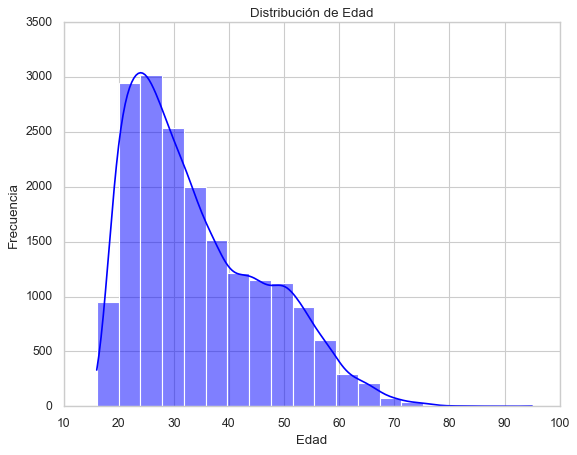

In [78]:
# Ajustar el estilo de los gráficos
sns.set(style="whitegrid")

# Distribución por Edad
plt.figure(figsize=(8, 6))
sns.histplot(grouped_by_way['age'], bins=20, kde=True, color='blue')  # kde=True para suavizar la curva
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

#### 1.1.4. Distribución por Estado Civil

In [79]:
# Contar la distribución por estado civil
marital_status_distribution = grouped_by_way['MaritalStatus'].value_counts()

# Calcular el porcentaje de cada categoría
marital_status_percentage = (marital_status_distribution / marital_status_distribution.sum()) * 100

# Crear un nuevo DataFrame con las frecuencias y porcentajes
marital_status_df = marital_status_distribution.reset_index()
marital_status_df.columns = ['MaritalStatus', 'Count']
marital_status_df['Percentage'] = marital_status_percentage.values

# Crear gráfico ordenado de mayor a menor
figura4 = px.bar(marital_status_df, 
                 x='MaritalStatus', 
                 y='Count', 
                 title='Distribución por Estado Civil', 
                 labels={'MaritalStatus': 'Estado Civil', 'Count': 'Cantidad'}, 
                 color='MaritalStatus',
                 category_orders={"MaritalStatus": marital_status_distribution.index},  # Ordenar de mayor a menor
                 text=marital_status_df['Percentage'].round(2).astype(str) + '%'  # Mostrar porcentaje
                )

print(marital_status_distribution)
# Mejorar diseño
figura4.update_traces(textposition='outside')  # Colocar el texto fuera de las barras
figura4.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Personalizar el tooltip para mostrar la suma total de IDs y el estado civil
figura4.update_traces(
    hovertemplate='<br>Estado Civil=%{x}<br>Total IDs=%{y}'
)

# Mostrar gráfico
figura4.show()

Single               13718
Married               2561
Divorced              1200
Separated              553
Significant Other      387
Widowed                121
Unknown                 70
Name: MaritalStatus, dtype: int64


### 1.2. Análisis adicionales

#### 1.2.1 Distribución de la Puntación COMPAS

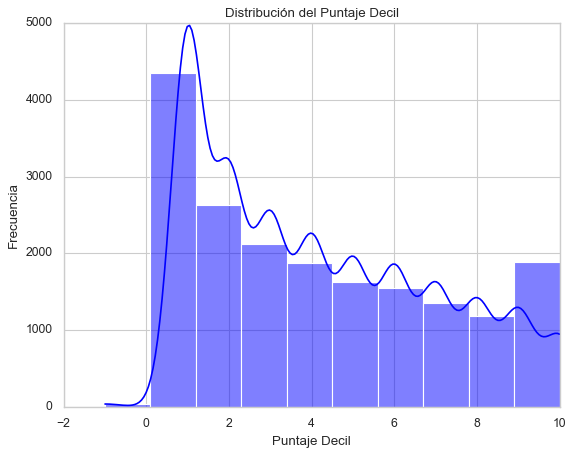

In [80]:
# Distribución del Puntaje Decil
plt.figure(figsize=(8, 6))
sns.histplot(df_compas_raw_risk_of_reicidivism['DecileScore'], bins=10, kde=True, color='blue')
plt.title('Distribución del Puntaje Decil')
plt.xlabel('Puntaje Decil')
plt.ylabel('Frecuencia')
plt.show()

#### 1.2.2. Distribución por Nivel de Riesgo

In [81]:
# Contar la distribución por ScoreText
scoretext_distribution = grouped_by_way['ScoreText'].value_counts()

# Calcular el porcentaje de cada categoría
scoretext_percentage = (scoretext_distribution / scoretext_distribution.sum()) * 100

# Crear un nuevo DataFrame con las frecuencias y porcentajes
scoretext_df = scoretext_distribution.reset_index()
scoretext_df.columns = ['ScoreText', 'Count']
scoretext_df['Percentage'] = scoretext_percentage.values

# Crear gráfico ordenado de mayor a menor
figura5 = px.bar(scoretext_df, 
                 x='ScoreText', 
                 y='Count', 
                 title='Distribución por Grupo de Riesgo (ScoreText)', 
                 labels={'ScoreText': 'Riesgo', 'Count': 'Cantidad'}, 
                 color='ScoreText',  # Puedes eliminar esto si no quieres colorear por categoría
                 category_orders={"ScoreText": scoretext_distribution.index},  # Ordenar de mayor a menor
                 text=scoretext_df['Percentage'].round(2).astype(str) + '%'  # Mostrar porcentaje
                )

print(scoretext_distribution)
# Mejorar diseño
figura5.update_traces(textposition='outside')  # Colocar el texto fuera de las barras
figura5.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Mostrar gráfico
figura5.show()

Low       10975
Medium     4531
High       3070
Name: ScoreText, dtype: int64


#### 1.2.3. Distribución por Nivel de supervisión

In [82]:
# Nivel de supervisión recomendado por género usando Plotly
fig_supervision_gender = px.histogram(
    grouped_by_way,
    x='RecSupervisionLevelText',
    color='Sex_Code_Text',
    title='Nivel de Supervisión Recomendado por Género',
    color_discrete_map={'Male': '#1f77b4', 'Female': '#ff00ff'},  # Colores fuertes
    labels={'RecSupervisionLevelText': 'Nivel de Supervisión', 'count': 'Número de Registros'}
)

fig_supervision_gender.update_traces(
    hovertemplate='<br>Nivel de Supervisión=%{x}<br>Género=%{color}<br>Total Registros=%{y}'
)

fig_supervision_gender.update_layout(
    xaxis_title='Nivel de Supervisión',
    yaxis_title='Número de Registros',
    title={'text': 'Nivel de Supervisión Recomendado por Género', 'x':0.5},
    xaxis={'categoryorder': 'total descending'},  # Ordenar de mayor a menor
    bargap=0.2
)

fig_supervision_gender.show()

# Nivel de supervisión recomendado por etnicidad usando Plotly
fig_supervision_ethnicity = px.histogram(
    grouped_by_way,
    x='RecSupervisionLevelText',
    color='Ethnic_Code_Text',
    title='Nivel de Supervisión Recomendado por Etnicidad',
    color_discrete_map={
        'African-American': '#1f77b4',  # Azul
        'Caucasian': '#ff00ff',         # Fucsia
        'Hispanic': '#2ca02c',          # Verde
        'Other': '#d62728',            # Rojo
        'Native American': '#9467bd',  # Púrpura
        'Asian': '#8c564b',            # Marrón
        'African-Am': '#e377c2'         # Rosa claro
    },
    labels={'RecSupervisionLevelText': 'Nivel de Supervisión', 'count': 'Número de Registros'}
)

fig_supervision_ethnicity.update_traces(
    hovertemplate='<br>Nivel de Supervisión=%{x}<br>Etnicidad=%{color}<br>Total Registros=%{y}'
)

fig_supervision_ethnicity.update_layout(
    xaxis_title='Nivel de Supervisión',
    yaxis_title='Número de Registros',
    title={'text': 'Nivel de Supervisión Recomendado por Etnicidad', 'x':0.5},
    xaxis={'categoryorder': 'total descending'},  # Ordenar de mayor a menor
    bargap=0.2
)

fig_supervision_ethnicity.show()

# Nivel de supervisión recomendado por Estado Civil usando Plotly
fig_supervision_marital_status = px.histogram(
    grouped_by_way,
    x='RecSupervisionLevelText',
    color='MaritalStatus',
    title='Nivel de Supervisión Recomendado por Estado Civil',
    color_discrete_map={
        'Single': '#1f77b4',          # Azul
        'Separated': '#ff00ff',       # Fucsia
        'Divorced': '#2ca02c',        # Verde
        'Married': '#d62728',         # Rojo
        'Widowed': '#9467bd',         # Púrpura
        'Significant Other': '#8c564b',  # Marrón
        'Unknown': '#e377c2'          # Rosa claro
    },
    labels={'RecSupervisionLevelText': 'Nivel de Supervisión', 'count': 'Número de Registros'}
)

fig_supervision_marital_status.update_traces(
    hovertemplate='<br>Nivel de Supervisión=%{x}<br>Estado Civil=%{color}<br>Total Registros=%{y}'
)

fig_supervision_marital_status.update_layout(
    xaxis_title='Nivel de Supervisión',
    yaxis_title='Número de Registros',
    title={'text': 'Nivel de Supervisión Recomendado por Estado Civil', 'x': 0.5},
    xaxis={'categoryorder': 'total descending'},  # Ordenar de mayor a menor
    bargap=0.2
)

fig_supervision_marital_status.show()

# Mostrar los porcentajes de distribución para RecSupervisionLevelText por género
supervision_gender_counts = grouped_by_way.groupby('RecSupervisionLevelText')['Sex_Code_Text'].value_counts(normalize=True).unstack().fillna(0) * 100
print("\nDistribución de Nivel de Supervisión Recomendado por Género:")
print(supervision_gender_counts)

# Mostrar los porcentajes de distribución para RecSupervisionLevelText por etnicidad
supervision_ethnicity_counts = grouped_by_way.groupby('RecSupervisionLevelText')['Ethnic_Code_Text'].value_counts(normalize=True).unstack().fillna(0) * 100
print("\nDistribución de Nivel de Supervisión Recomendado por Etnicidad:")
print(supervision_ethnicity_counts)

# Mostrar los porcentajes de distribución para RecSupervisionLevelText por Estado Civil
supervision_marital_status_counts = grouped_by_way.groupby('RecSupervisionLevelText')['MaritalStatus'].value_counts(normalize=True).unstack().fillna(0) * 100
print("\nDistribución de Nivel de Supervisión Recomendado por Estado Civil:")
print(supervision_marital_status_counts)



Distribución de Nivel de Supervisión Recomendado por Género:
Sex_Code_Text                          Female       Male
RecSupervisionLevelText                                 
High                                 9.906542  90.093458
Low                                 23.935730  76.064270
Medium                              22.873346  77.126654
Medium with Override Consideration  19.415358  80.584642

Distribución de Nivel de Supervisión Recomendado por Etnicidad:
Ethnic_Code_Text                    African-American    Arabic     Asian  \
RecSupervisionLevelText                                                    
High                                       73.925234  0.093458  0.280374   
Low                                        33.220142  0.140798  0.770250   
Medium                                     56.301197  0.157530  0.189036   
Medium with Override Consideration         67.015707  0.087260  0.087260   

Ethnic_Code_Text                    Caucasian   Hispanic  Native American 

## 2. Correlaciones

### 2.1. Correlaciones con la puntuación COMPAS

#### 2.1.1 Puntuación según Genero

In [83]:
# Crear un boxplot de la relación entre género y puntaje de riesgo (DecileScore)
figura6 = px.box(grouped_by_way, 
                 x='Sex_Code_Text', 
                 y='DecileScore', 
                 title='Distribución de DecileScore por Género', 
                 labels={'Sex_Code_Text': 'Género', 'DecileScore': 'Puntaje de Riesgo'},
                 color='Sex_Code_Text',  # Colorear por género
                 category_orders={"Sex_Code_Text": grouped_by_way['Sex_Code_Text'].value_counts().index}  # Ordenar géneros por frecuencia
                )

# Mejorar el diseño del gráfico
figura6.update_traces(boxmean='sd')  # Mostrar la media y la desviación estándar
figura6.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Mostrar gráfico interactivo
figura6.show()


In [84]:
# Crear histograma de DecileScore por género con barras superpuestas
figura9 = px.histogram(grouped_by_way, 
                       x='DecileScore', 
                       color='Sex_Code_Text',  # Color por género
                       title='Gráfico de DecilScore por Género', 
                       nbins=10, 
                       opacity=0.7  # Transparencia para superposición
                      )

# Mejorar diseño
figura9.update_layout(bargap=0.1)  # Espacio entre las barras

# Mostrar gráfico
figura9.show()

#### 2.1.2 Puntuación según Etnia

In [85]:
# Crear un boxplot de la relación entre etnia y puntaje de riesgo (DecileScore)
figura7 = px.box(grouped_by_way, 
                 x='Ethnic_Code_Text', 
                 y='DecileScore', 
                 title='Distribución de DecileScore por Etnia', 
                 labels={'Ethnic_Code_Text': 'Raza/Etnia', 'DecileScore': 'Puntaje de Riesgo'},
                 color='Ethnic_Code_Text',  # Colorear según la etnia
                 category_orders={"Ethnic_Code_Text": grouped_by_way['Ethnic_Code_Text'].value_counts().index}  # Ordenar etnias por frecuencia
                )

# Mejorar el diseño del gráfico
figura7.update_traces(boxmean='sd')  # Mostrar la media y la desviación estándar
figura7.update_layout(showlegend=False)  # Ocultar leyenda si no es necesaria

# Mostrar gráfico interactivo
figura7.show()

In [86]:
# Crear histograma de DecileScore por raza con barras superpuestas
figura10 = px.histogram(grouped_by_way, 
                       x='DecileScore', 
                       color='Ethnic_Code_Text',  # Color por género
                       title='Gráfico de DecilScore por Etnia', 
                       nbins=10, 
                       opacity=0.7  # Transparencia para superposición
                      )

# Mejorar diseño
figura10.update_layout(bargap=0.1)  # Espacio entre las barras

# Mostrar gráfico
figura10.show()

Analizamos conjuntamente Etnia y Género

In [87]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Distribución de puntuaciones en deciles por género y etnicidad usando Plotly
fig_box = px.box(
    grouped_by_way,
    x='Sex_Code_Text',
    y='DecileScore',
    color='Ethnic_Code_Text',
    title='Distribución de Puntuaciones en Deciles por Género y Etnicidad',
    color_discrete_map={
        'African-American': '#1f77b4',  # Azul
        'Caucasian': '#ff00ff',         # Fucsia
        'Hispanic': '#2ca02c',          # Verde
        'Other': '#d62728',            # Rojo
        'Native American': '#9467bd',  # Púrpura
        'Asian': '#8c564b',            # Marrón
        'African-Am': '#e377c2'         # Rosa claro
    }
)

fig_box.update_traces(
    boxmean='sd',  # Muestra la desviación estándar
    hovertemplate='<br>Género=%{x}<br>Decile Score=%{y:.2f}<br>Etnicidad=%{color}<br>'
)

fig_box.update_layout(
    xaxis_title='Género',
    yaxis_title='Puntuación en Deciles',
    title={'text': 'Distribución de DecileScore por Etnia y Género', 'x':0.5},
    xaxis={'categoryorder': 'total descending'},  # Ordenar de mayor a menor
    boxmode='group'
)

fig_box.show()

#### 2.1.3 Puntuación según Edad

In [88]:
# Crear una nueva columna que agrupa la edad en rangos de 10 años
grouped_by_way['AgeGroup'] = pd.cut(grouped_by_way['age'], bins=[0, 20, 30, 40, 50, 60, 70, 100], 
                                    labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+'])

# Crear un boxplot de DecileScore por grupo de edad
figura_age_box = px.box(grouped_by_way, 
                       x='AgeGroup', 
                       y='DecileScore', 
                       title='Distribución del DecileScore por Grupo de Edad', 
                       labels={'AgeGroup': 'Grupo de Edad', 'DecileScore': 'Puntaje de Riesgo'},
                       color='AgeGroup',  # Colorear por grupo de edad
                       category_orders={'AgeGroup': ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']}  # Ordenar grupos de edad
                      )

# Mejorar el diseño del gráfico
figura_age_box.update_traces(boxmean='sd')  # Mostrar la media y la desviación estándar
figura_age_box.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Mostrar gráfico interactivo
figura_age_box.show()


In [89]:
# Crear una nueva columna que agrupa la edad en rangos de 10 años
grouped_by_way['AgeGroup'] = pd.cut(grouped_by_way['age'], bins=[0, 20, 30, 40, 50, 60, 70, 100], 
                                    labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+'])

# Crear histograma de DecileScore por grupo de edad con barras superpuestas
figura_age = px.histogram(grouped_by_way, 
                          x='DecileScore', 
                          color='AgeGroup',  # Colorear por grupo de edad
                          title='Gráfico de DecilScore por grupo de Edad', 
                          nbins=10, 
                          opacity=0.7,  # Transparencia para superposición
                          category_orders={'AgeGroup': ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']}  # Ordenar grupos de edad
                         )

# Mejorar el diseño
figura_age.update_layout(bargap=0.1)  # Espacio entre las barras

# Mostrar gráfico
figura_age.show()

#### 2.1.4 Puntuación según Estado Civil

In [90]:
# Crear histograma de DecileScore por raza con barras superpuestas
figura12 = px.histogram(grouped_by_way, 
                       x='DecileScore', 
                       color='MaritalStatus',  # Color por Estado Civil
                       title='Gráfico de DecilScore por Estado Civil', 
                       nbins=10, 
                       opacity=0.7  # Transparencia para superposición
                      )

# Mejorar diseño
figura12.update_layout(bargap=0.1)  # Espacio entre las barras

# Mostrar gráfico
figura12.show()

## 3. Identificación de Sesgos

1. Posible Sesgo Racial: Los análisis revelan que los afroamericanos tienden a recibir puntuaciones más elevadas en el sistema COMPAS, lo que sugiere una mayor probabilidad de reincidencia. Esta tendencia podría ser indicativa de un sesgo racial en el algoritmo, posiblemente reflejando prejuicios históricos en los datos de entrenamiento o en el diseño del modelo. La sobre-representación de afroamericanos en las categorías de alto riesgo podría resultar en una desventaja sistemática para este grupo, afectando la equidad en las decisiones de justicia penal.

2. Posible Sesgo de Género: La variabilidad en las puntuaciones de riesgo muestra que los hombres tienen una mayor dispersión y frecuencia de puntuaciones altas en comparación con las mujeres. Esto sugiere un sesgo de género en el sistema COMPAS, donde los hombres podrían ser evaluados con un riesgo más alto que las mujeres. Esta disparidad podría influir en cómo se asignan las intervenciones y supervisiones, afectando de manera desproporcionada a los hombres en el sistema de justicia.

3. Posible Sesgo de Edad: Los resultados indican que los individuos mayores tienden a recibir puntuaciones más bajas de riesgo de reincidencia, mientras que los más jóvenes reciben puntuaciones más altas. Este patrón sugiere un posible sesgo relacionado con la edad en el sistema, donde el riesgo de reincidencia para los adultos mayores podría ser subestimado en comparación con los jóvenes. Esto podría conducir a decisiones de supervisión e intervención que no reflejan con precisión el riesgo real basado en la edad.

4. Posible Sesgo de Estado Civil: Los datos muestran que una gran mayoría (73.66%) de los evaluados en el sistema COMPAS son solteros. Esta alta representación sugiere que el estado civil podría estar influyendo en las evaluaciones del riesgo de reincidencia. Si ser soltero está asociado con puntuaciones más altas, esto podría indicar un sesgo en el sistema que afecta la precisión y la justicia de las evaluaciones.

## 4. Insights

1. Desproporción de Puntuaciones Altas para Afroamericanos: El análisis muestra que los afroamericanos tienen una mayor proporción de puntuaciones altas en el sistema COMPAS, lo que sugiere una tendencia a clasificar a este grupo con un mayor riesgo de reincidencia. Esta desproporción podría ser un reflejo de sesgos raciales en el sistema, que podría llevar a una aplicación desigual de las políticas de justicia penal.

2. Desigualdad en Puntuaciones de Riesgo por Género: La evaluación revela que los hombres tienen una mayor variabilidad en sus puntuaciones de riesgo y un número mayor de puntuaciones altas en comparación con las mujeres. Este hallazgo apunta a un posible sesgo de género, donde los hombres podrían estar siendo evaluados con un mayor riesgo de reincidencia, afectando cómo se les supervisa e interviene.

3. Impacto de la Edad en las Puntuaciones de Riesgo: Las puntuaciones de riesgo tienden a ser más bajas para los individuos mayores y más altas para los más jóvenes. Esto sugiere que el sistema podría estar sesgado por edad, con una posible subestimación del riesgo para los mayores y una sobreestimación para los jóvenes. Este sesgo podría influir en la equidad de las decisiones de supervisión e intervención.

4. Influencia del Estado Civil en la Evaluación del Riesgo: La predominancia de individuos solteros en el sistema COMPAS (73.66%) podría estar afectando las evaluaciones del riesgo de reincidencia. Si el estado civil soltero está asociado con puntuaciones más altas, esto podría reflejar un sesgo que afecta la precisión y equidad de las evaluaciones.



# Análisis del Dataset2: "Compas-scores-two-years"

## 1. Análisis y distribuciones

### 1.1. Distribución Demográfica

#### 1.1.1. Distribución por género

In [91]:
# Contar la distribución por género
sex_distribution = df_compas_2y['sex'].value_counts()

# Calcular el porcentaje de cada categoría
sex_distribution_percentage = (sex_distribution / sex_distribution.sum()) * 100

# Crear un nuevo DataFrame con las frecuencias y porcentajes
sex_distribution_df = sex_distribution.reset_index()
sex_distribution_df.columns = ['sex', 'Count']
sex_distribution_df['Percentage'] = sex_distribution_percentage.values

# Crear gráfico ordenado de mayor a menor
figura2 = px.bar(sex_distribution_df, 
                 x='sex', 
                 y='Count', 
                 title='Distribución por Género', 
                 labels={'sex': 'Género', 'Count': 'Cantidad'}, 
                 color='sex',
                 category_orders={"sex": sex_distribution.index},  # Ordenar de mayor a menor
                 text=sex_distribution_df['Percentage'].round(2).astype(str) + '%'  # Mostrar porcentaje
                )

# Mejorar diseño
figura2.update_traces(textposition='outside')  # Colocar el texto fuera de las barras
figura2.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Personalizar el tooltip para mostrar la suma total de IDs
figura2.update_traces(
    hovertemplate='<br>Género=%{x}<br>Total=%{y}'
)

# Mostrar gráfico
figura2.show()

#### 1.1.2 Distribución por Etnia

In [92]:
# Contar la distribución por etnia
ethnicity_distribution = df_compas_2y['race'].value_counts()

# Calcular el porcentaje de cada categoría
ethnicity_distribution_percentage = (ethnicity_distribution / ethnicity_distribution.sum()) * 100

# Crear un nuevo DataFrame con las frecuencias y porcentajes
ethnicity_distribution_df = ethnicity_distribution.reset_index()
ethnicity_distribution_df.columns = ['race', 'Count']
ethnicity_distribution_df['Percentage'] = ethnicity_distribution_percentage.values

# Crear gráfico ordenado de mayor a menor
figura3 = px.bar(ethnicity_distribution_df, 
                 x='race', 
                 y='Count', 
                 title='Distribución por Etnia', 
                 labels={'race': 'Raza/Etnia', 'Count': 'Cantidad'}, 
                 color='race',
                 category_orders={"race": ethnicity_distribution.index},  # Ordenar de mayor a menor
                 text=ethnicity_distribution_df['Percentage'].round(2).astype(str) + '%'  # Mostrar porcentaje
                )

# Mejorar diseño
figura3.update_traces(textposition='outside')  # Colocar el texto fuera de las barras
figura3.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Personalizar el tooltip para mostrar la suma total de IDs
figura3.update_traces(
    hovertemplate='<br>Raza=%{x}<br>Total=%{y}'
)

# Mostrar gráfico
figura3.show()

#### 1.1.3. Distribución por Edad

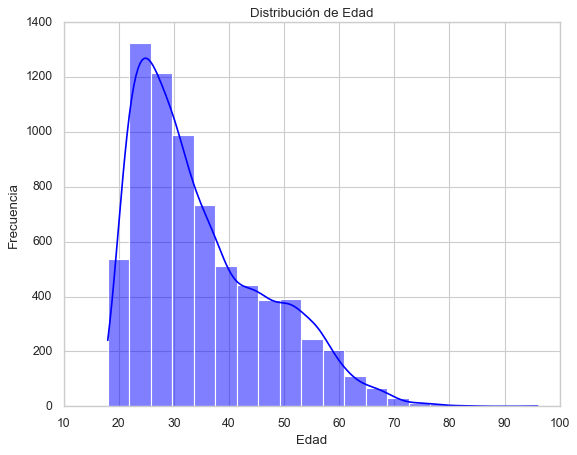

In [93]:
# Ajustar el estilo de los gráficos
sns.set(style="whitegrid")

# Distribución por Edad
plt.figure(figsize=(8, 6))
sns.histplot(df_compas_2y['age'], bins=20, kde=True, color='blue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### 1.2. Análisis adicionales

#### 1.2.1 Distribución de la Puntación COMPAS

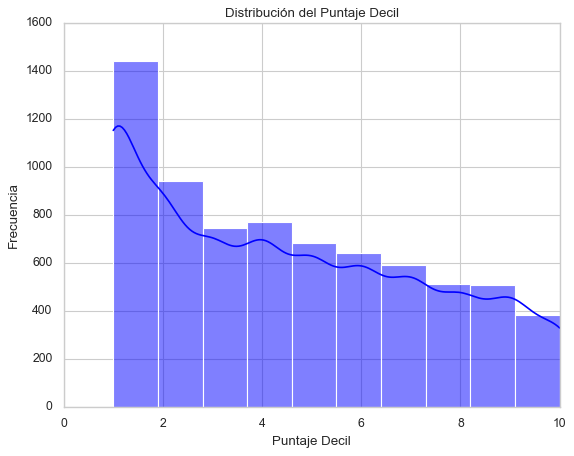

In [94]:
# Distribución del Puntaje Decil
plt.figure(figsize=(8, 6))
sns.histplot(df_compas_2y['decile_score'], bins=10, kde=True, color='blue')
plt.title('Distribución del Puntaje Decil')
plt.xlabel('Puntaje Decil')
plt.ylabel('Frecuencia')
plt.show()

#### 1.2.2 Distribución de la Reincidencia en Dos Años

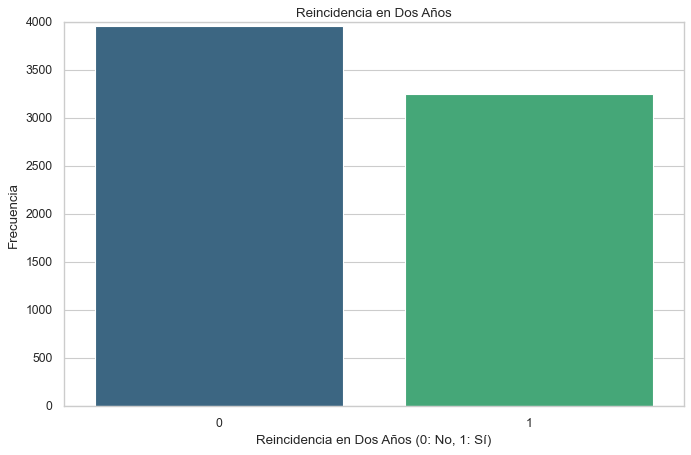

In [95]:
# Reincidencia en Dos Años
plt.figure(figsize=(10, 6))
sns.countplot(x='two_year_recid', data=df_compas_2y, palette='viridis')
plt.title('Reincidencia en Dos Años')
plt.xlabel('Reincidencia en Dos Años (0: No, 1: Sí)')
plt.ylabel('Frecuencia')
plt.show()

Aproximadamente un poco más de la mitad de los individuos reincidieron dentro de dos años. Este indicador puede mostrar la efectividad de las medidas de rehabilitación. 

#### 1.2.2 Distribución de la Reincidencia Violenta

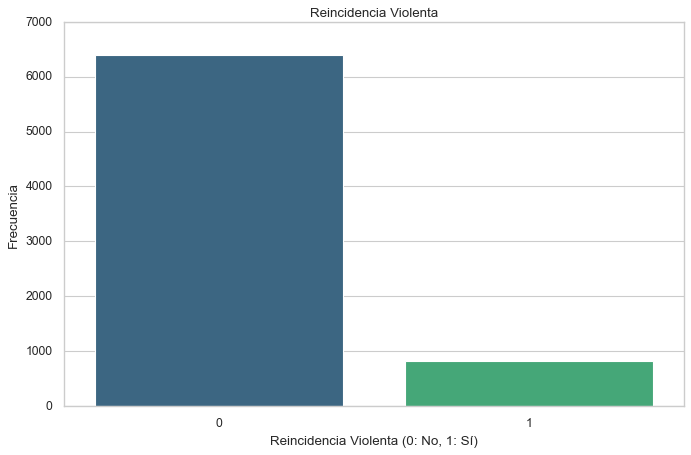

In [96]:
# Reincidencia Violenta
plt.figure(figsize=(10, 6))
sns.countplot(x='is_violent_recid', data=df_compas_2y, palette='viridis')
plt.title('Reincidencia Violenta')
plt.xlabel('Reincidencia Violenta (0: No, 1: Sí)')
plt.ylabel('Frecuencia')
plt.show()

Menor proporción de los individuos reincidieron de manera violenta, lo que sugiere que la reincidencia violenta es menos común.

## 2. Correlaciones

### 2.1. Correlaciones con la puntuación COMPAS

#### 2.1.1 Puntuación según Genero

In [97]:
# Crear un boxplot de la relación entre género y puntaje de riesgo (DecileScore)
figura6 = px.box(df_compas_2y, 
                 x='sex', 
                 y='decile_score', 
                 title='Distribución de DecileScore por Género', 
                 labels={'sex': 'Género', 'decile_score': 'Puntaje de Riesgo'},
                 color='sex',  # Colorear por género
                 category_orders={"sex": df_compas_2y['sex'].value_counts().index}  # Ordenar géneros por frecuencia
                )

# Mejorar el diseño del gráfico
figura6.update_traces(boxmean='sd')  # Mostrar la media y la desviación estándar
figura6.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Mostrar gráfico interactivo
figura6.show()

#### 2.1.2. Puntuación según Etnia

In [98]:
# Crear un boxplot de la relación entre raza y puntaje de riesgo (decile_score)
figura7 = px.box(df_compas_2y, 
                 x='race', 
                 y='decile_score', 
                 title='Distribución de DecileScore por Etnia', 
                 labels={'race': 'Raza/Etnia', 'decile_score': 'Puntaje de Riesgo'},
                 color='race',  # Colorear según la raza
                 category_orders={"race": df_compas_2y['race'].value_counts().index}  # Ordenar razas por frecuencia
                )

# Mejorar el diseño del gráfico
figura7.update_traces(boxmean='sd')  # Mostrar la media y la desviación estándar
figura7.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Mostrar gráfico interactivo
figura7.show()

#### 2.1.2. Puntuación según Edad

In [99]:
# Crear una nueva columna que agrupa la edad en rangos de 10 años
df_compas_2y['AgeGroup'] = pd.cut(df_compas_2y['age'], bins=[0, 20, 30, 40, 50, 60, 70, 100], 
                                   labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+'])

# Crear un boxplot de DecileScore por grupo de edad
figura_age_box = px.box(df_compas_2y, 
                       x='AgeGroup', 
                       y='decile_score', 
                       title='Distribución del Puntaje Decil por Grupo de Edad', 
                       labels={'AgeGroup': 'Grupo de Edad', 'decile_score': 'Puntaje Decil'},
                       color='AgeGroup',  # Colorear por grupo de edad
                       category_orders={'AgeGroup': ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']}  # Ordenar grupos de edad
                      )

# Mejorar el diseño del gráfico
figura_age_box.update_traces(boxmean='sd')  # Mostrar la media y la desviación estándar
figura_age_box.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Mostrar gráfico interactivo
figura_age_box.show()

#### 2.1.4. Puntuación según si Reincide en Dos Años

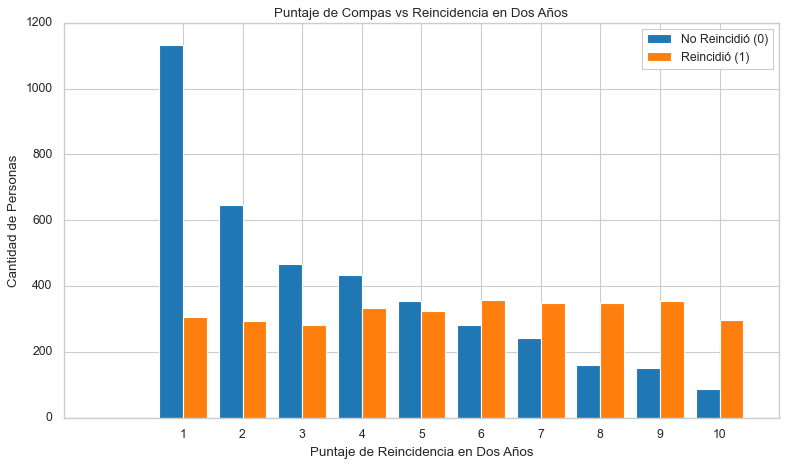

In [100]:
# Contar la cantidad de personas por puntaje de violencia y reincidencia
v_decile_recid_counts = df_compas_2y.groupby(['decile_score', 'two_year_recid']).size().unstack().fillna(0)

# Configurar las posiciones para las barras
positions = list(range(len(v_decile_recid_counts.index)))
width = 0.4  # Ancho de las barras

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
plt.bar([p - width/2 for p in positions], v_decile_recid_counts[0], width, label='No Reincidió (0)', color='#1f77b4')
plt.bar([p + width/2 for p in positions], v_decile_recid_counts[1], width, label='Reincidió (1)', color='#ff7f0e')

# Configurar los ejes y el título
plt.title('Puntaje de Compas vs Reincidencia en Dos Años')
plt.xlabel('Puntaje de Reincidencia en Dos Años')
plt.ylabel('Cantidad de Personas')
plt.xticks(positions, v_decile_recid_counts.index)  # Etiquetas del eje X basadas en el puntaje de violencia
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### 2.1.4. Puntuación según Delitos Previos

In [101]:
# Crear un gráfico de cajas con decile_score en el eje X y priors_count en el eje Y
fig = px.box(
    df_compas_2y,
    x='decile_score',  # Puntaje Decil en el eje X
    y='priors_count',  # Número de delitos previos en el eje Y
    title='Distribución del Número de Delitos Previos por Puntaje Decil',
    labels={'decile_score': 'Puntaje Decil', 'priors_count': 'Número de Delitos Previos'},
    category_orders={'decile_score': sorted(df_compas_2y['decile_score'].unique())},  # Ordenar los deciles
    points='all',  # Mostrar todos los puntos de datos
    color_discrete_sequence=['#1f77b4']  # Color de las cajas
)

# Configuración adicional del gráfico
fig.update_layout(
    xaxis_title='Puntaje Decil',
    yaxis_title='Número de Delitos Previos',
    title={'text': 'Distribución del Número de Delitos Previos por Puntaje Decil', 'x': 0.5},
    boxmode='group',  # Agrupar las cajas
    plot_bgcolor='white',  # Fondo blanco para el gráfico
    paper_bgcolor='#f9f9f9',  # Fondo claro para el papel
    font=dict(size=12, color='#333'),  # Tamaño y color de fuente
    xaxis=dict(
        tickvals=sorted(df_compas_2y['decile_score'].unique()),  # Etiquetas del eje X
        ticktext=[f'Decile {i}' for i in sorted(df_compas_2y['decile_score'].unique())]  # Etiquetas de decile
    ),
    yaxis=dict(
        showgrid=True,  # Mostrar la cuadrícula del eje Y
        gridcolor='rgba(0,0,0,0.1)'  # Color de la cuadrícula
    )
)

# Mostrar el gráfico
fig.show()


### 2.2. Matriz de correlaciones

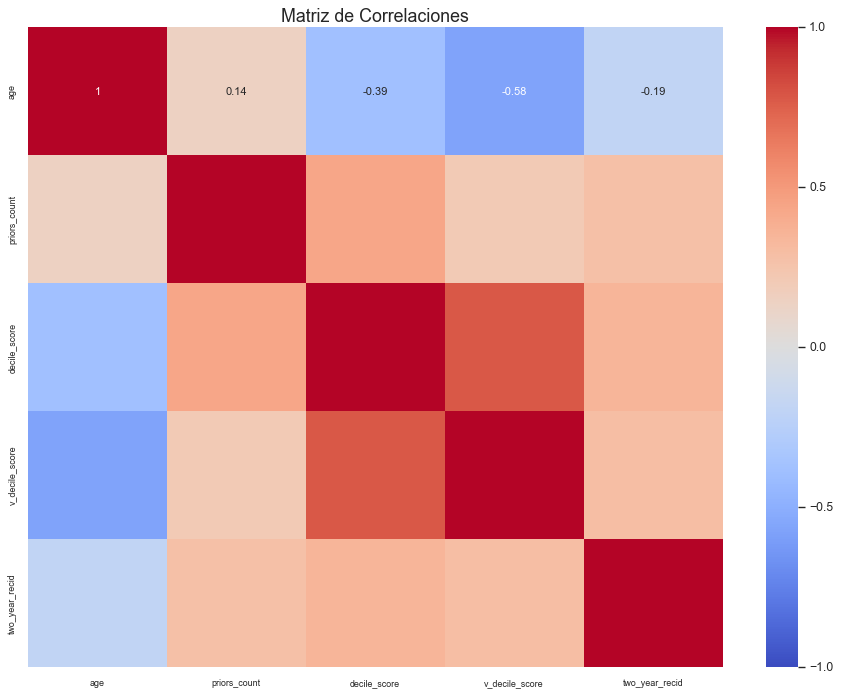

Correlaciones entre las variables seleccionadas:
                     age  priors_count  decile_score  v_decile_score  \
age             1.000000      0.142773     -0.387733       -0.575900   
priors_count    0.142773      1.000000      0.435350        0.208674   
decile_score   -0.387733      0.435350      1.000000        0.775697   
v_decile_score -0.575900      0.208674      0.775697        1.000000   
two_year_recid -0.190323      0.275117      0.350703        0.295895   

                two_year_recid  
age                  -0.190323  
priors_count          0.275117  
decile_score          0.350703  
v_decile_score        0.295895  
two_year_recid        1.000000  


In [102]:
# Matriz de Correlaciones Mejorada
variables = ['age', 'priors_count', 'decile_score', 'v_decile_score', 'two_year_recid']
correlation_matrix = df_compas_2y[variables].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Matriz de Correlaciones', fontsize=16)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Impresión de las correlaciones mejoradas
print("Correlaciones entre las variables seleccionadas:")
print(correlation_matrix)

## 3. Identificación de Sesgos

1. Los mismos posibles sesgos Raciales, de Género y de Edad, que en el anterior dataset: los datos de una tabla y la otra tienen total correlación.

2. Posible Sesgo de historial delictivo: El análisis revela que el puntaje decil tiende a aumentar con el número de delitos previos, sugiriendo un sesgo en el sistema de evaluación. Las personas con un historial delictivo más extenso reciben sistemáticamente puntuaciones más altas, lo que podría reflejar una penalización desproporcionada basada en el número de delitos previos.

## 4. Insights

1. Las principales variables que se han analizado en el anterior dataset y ahora en este, comparten las mismas características de distribución.

2. A Primera vista después de un análisis básico, parece que el modelo de COMPAS tiene un nivel decente de acierto en sus puntajes. Cuanto más alta es la puntuación, más porcentaje de personas que han terminado reincidiendo en los siguientes dos años.

3. La mayoría de los individuos evaluados son afroamericanos, lo que podría indicar una representación desproporcionada de este grupo en el sistema de evaluación de riesgos.

4. Aproximadamente la mitad de los individuos reincidieron dentro de dos años, lo que sugiere que el sistema tiene una capacidad moderada para predecir la reincidencia.

5. Una menor proporción de los individuos evaluados reincidieron violentamente, destacando una diferencia entre la reincidencia general y la reincidencia violenta.

6. La distribución del puntaje decil muestra que los puntajes más comunes están entre 1-6, pero también hay un número notable de individuos con puntajes altos (9-10), indicando una dispersión en la evaluación del riesgo.

7. Los hombres tienden a tener puntajes de riesgo más altos que las mujeres, lo que sugiere un posible sesgo de género en la evaluación de riesgos.

8. Los afroamericanos tienden a recibir puntajes de riesgo más altos que otros grupos raciales, lo que podría indicar un sesgo racial en el sistema de evaluación.

9. Es necesaria una revisión crítica de los sistemas de evaluación de riesgos para asegurar que sean justos y equitativos, mitigando posibles sesgos y mejorando la precisión en la predicción de la reincidencia.


## 5. Otras variables a tener en cuenta

### 5.1. Delitos Juveniles

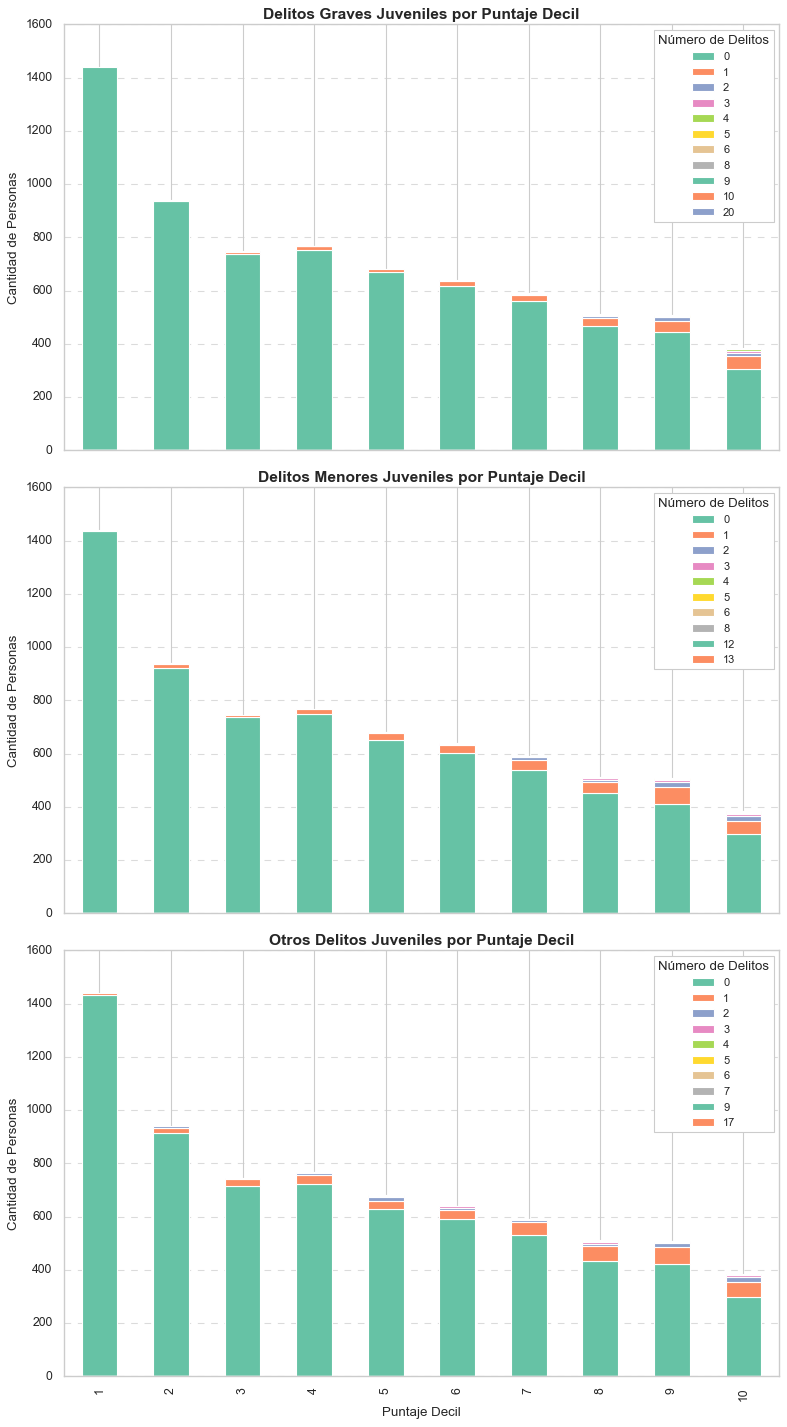

In [103]:
# Crear DataFrame de ejemplo
data = {
    'juv_fel_count': df_compas_2y['juv_fel_count'],
    'juv_misd_count': df_compas_2y['juv_misd_count'],
    'juv_other_count': df_compas_2y['juv_other_count'],
    'decile_score': df_compas_2y['decile_score']
}

df = pd.DataFrame(data)

# Función para crear un gráfico de barras agrupadas por número de delitos juveniles y puntaje decil
def plot_grouped_bar(df, column_name, ax, title):
    # Agrupar por puntaje decil y contar la cantidad de personas para cada número de delitos juveniles
    counts = df.groupby(['decile_score', column_name]).size().unstack().fillna(0)
    
    # Graficar barras apiladas por puntaje decil y número de delitos juveniles
    counts.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('Set2', len(counts.columns)))
    
    # Configurar el gráfico
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Puntaje Decil', fontsize=12)
    ax.set_ylabel('Cantidad de Personas', fontsize=12)
    ax.legend(title='Número de Delitos', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Crear la figura y los ejes (uno por cada tipo de delito juvenil)
fig, axs = plt.subplots(3, 1, figsize=(10, 18), sharex=True)

# Graficar para cada tipo de delito juvenil con títulos personalizados
plot_grouped_bar(df, 'juv_fel_count', axs[0], 'Delitos Graves Juveniles por Puntaje Decil')
plot_grouped_bar(df, 'juv_misd_count', axs[1], 'Delitos Menores Juveniles por Puntaje Decil')
plot_grouped_bar(df, 'juv_other_count', axs[2], 'Otros Delitos Juveniles por Puntaje Decil')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


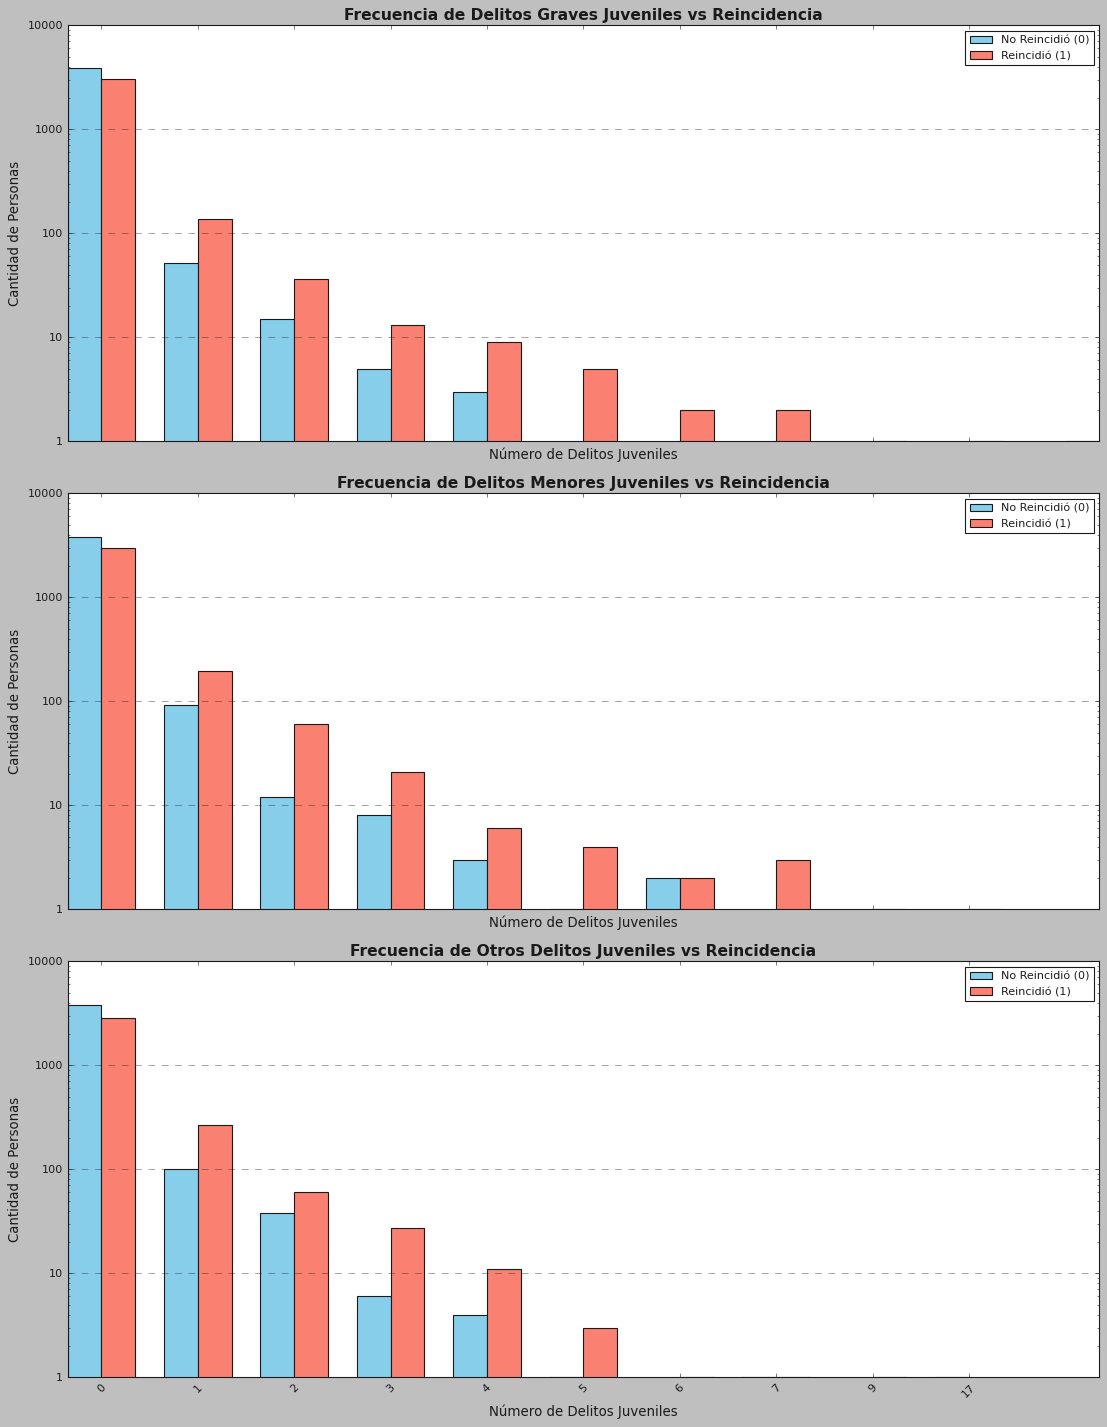

In [104]:
# Crear DataFrame de ejemplo
data = {
    'juv_fel_count': df_compas_2y['juv_fel_count'],
    'juv_misd_count': df_compas_2y['juv_misd_count'],
    'juv_other_count': df_compas_2y['juv_other_count'],
    'two_year_recid': df_compas_2y['two_year_recid']
}

df = pd.DataFrame(data)

# Configuración de estilo
plt.style.use('classic')

# Función para crear un gráfico de barras agrupadas
def plot_grouped_bar(df, column_name, ax, title):
    # Contar la cantidad de personas por cada número de delitos y reincidencia
    counts = df.groupby([column_name, 'two_year_recid']).size().unstack().fillna(0)
    
    # Configurar las posiciones para las barras
    positions = list(range(len(counts.index)))
    width = 0.35  # Ancho de las barras
    x = [p - width/2 for p in positions]  # Posiciones para las barras
    
    # Graficar barras para reincidencia (0) y no reincidencia (1)
    ax.bar([p - width/2 for p in positions], counts[0], width, label='No Reincidió (0)', color='skyblue')
    ax.bar([p + width/2 for p in positions], counts[1], width, label='Reincidió (1)', color='salmon')
    
    # Configurar el gráfico
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Número de Delitos Juveniles', fontsize=12)
    ax.set_ylabel('Cantidad de Personas', fontsize=12)
    ax.set_xticks(positions)
    ax.set_xticklabels(counts.index, rotation=45, fontsize=10)
    ax.set_yscale('log')  # Escala logarítmica en el eje Y

    # Ajustar el formato del eje Y
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
    ax.tick_params(axis='y', labelsize=10)

    ax.legend(loc='upper right', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Crear la figura y los ejes
fig, axs = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Graficar para cada tipo de delito juvenil con títulos actualizados
plot_grouped_bar(df, 'juv_fel_count', axs[0], 'Frecuencia de Delitos Graves Juveniles vs Reincidencia')
plot_grouped_bar(df, 'juv_misd_count', axs[1], 'Frecuencia de Delitos Menores Juveniles vs Reincidencia')
plot_grouped_bar(df, 'juv_other_count', axs[2], 'Frecuencia de Otros Delitos Juveniles vs Reincidencia')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


### 5.2. Distribución de Cargos

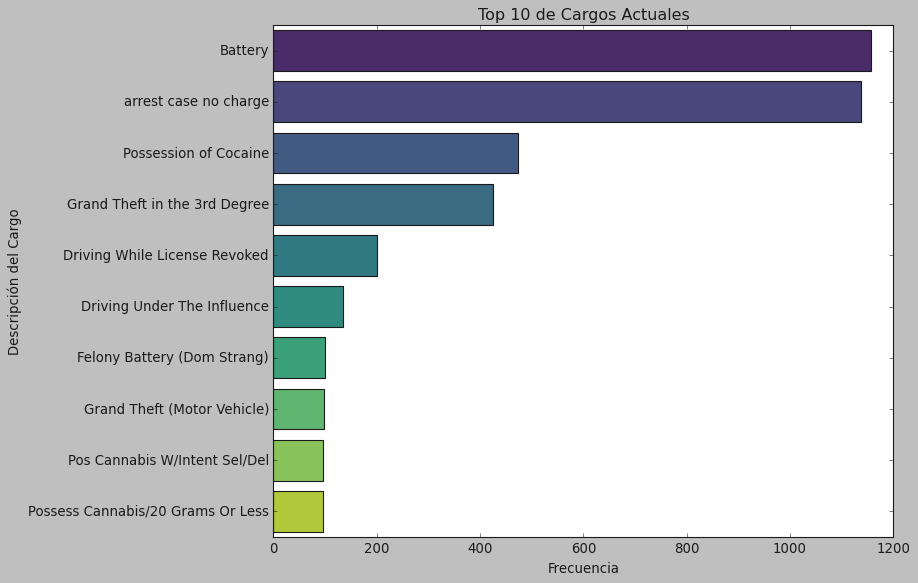

In [105]:
# Distribución de Cargos Actuales
plt.figure(figsize=(10, 8))
c_charge_desc_counts = df_compas_2y['c_charge_desc'].value_counts().nlargest(10)
sns.barplot(x=c_charge_desc_counts.values, y=c_charge_desc_counts.index, palette='viridis')
plt.title('Top 10 de Cargos Actuales')
plt.xlabel('Frecuencia')
plt.ylabel('Descripción del Cargo')
plt.show()

### 5.3. Correlaciones con la Puntuación Violenta

In [106]:
import plotly.express as px

# Crear un boxplot de la relación entre género y puntaje de reincidencia violenta (v_decile_score)
figura6 = px.box(df_compas_2y, 
                 x='sex', 
                 y='v_decile_score', 
                 title='Distribución de Puntaje de Reincidencia Violenta por Género', 
                 labels={'sex': 'Género', 'v_decile_score': 'Puntaje Violento'},
                 color='sex',  # Colorear por género
                 category_orders={"sex": df_compas_2y['sex'].value_counts().index}  # Ordenar géneros por frecuencia
                )

# Mejorar el diseño del gráfico
figura6.update_traces(boxmean='sd')  # Mostrar la media y la desviación estándar
figura6.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Mostrar gráfico interactivo
figura6.show()

In [107]:
import plotly.express as px

# Crear un boxplot de la relación entre raza y puntaje de reincidencia violenta (v_decile_score)
figura7 = px.box(df_compas_2y, 
                 x='race', 
                 y='v_decile_score',  # Cambiado a puntaje de reincidencia violenta
                 title='Distribución de Puntaje de Reincidencia Violenta por Raza', 
                 labels={'race': 'Raza/Etnia', 'v_decile_score': 'Puntaje Violento'},  # Etiquetas actualizadas
                 color='race',  # Colorear según la raza
                 category_orders={"race": df_compas_2y['race'].value_counts().index}  # Ordenar razas por frecuencia
                )

# Mejorar el diseño del gráfico
figura7.update_traces(boxmean='sd')  # Mostrar la media y la desviación estándar
figura7.update_layout(showlegend=False)  # Ocultar leyenda si no es necesaria

# Mostrar gráfico interactivo
figura7.show()

In [108]:
# Crear una nueva columna que agrupa la edad en rangos de 10 años
df_compas_2y['AgeGroup'] = pd.cut(df_compas_2y['age'], bins=[0, 20, 30, 40, 50, 60, 70, 100], 
                                   labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+'])

# Crear un boxplot de Puntaje de Reincidencia Violenta por grupo de edad
figura_age_box = px.box(df_compas_2y, 
                       x='AgeGroup', 
                       y='v_decile_score',  # Cambiado a puntaje de reincidencia violenta
                       title='Distribución del Puntaje de Reincidencia Violenta por Grupo de Edad', 
                       labels={'AgeGroup': 'Grupo de Edad', 'v_decile_score': 'Puntaje Violento'},  # Etiquetas actualizadas
                       color='AgeGroup',  # Colorear por grupo de edad
                       category_orders={'AgeGroup': ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']}  # Ordenar grupos de edad
                      )

# Mejorar el diseño del gráfico
figura_age_box.update_traces(boxmean='sd')  # Mostrar la media y la desviación estándar
figura_age_box.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Mostrar gráfico interactivo
figura_age_box.show()
